In [14]:
from utils.loader import USAGE, BENEFITS, FEEDBACK, EMPLOYEES
from usage_process import average_utilization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
feedback = FEEDBACK.drop_duplicates().drop(columns='Comments')
feedback= feedback.groupby(['EmployeeID','BenefitID'], as_index=False).mean().reset_index()
feedback= feedback.merge(BENEFITS, on='BenefitID')

In [16]:
feedback.drop(columns='index')

,EmployeeID,BenefitID,SatisfactionScore,BenefitType,BenefitSubType,BenefitCost
0,1,3,1.0,Commuter Benefits,Transit Subsidy,325.00
1,1,8,5.0,Wellness Programs,Premium Discount Tier 1,125.00
2,1,14,2.0,Gym Membership,Tier 1 Partners,73.36
3,1,18,3.0,Retirement Plan,401k Investment Fees,743.01
4,1,22,3.0,Health Insurance,HMO Family,624.00
...,...,...,...,...,...,...
27175,5000,7,5.0,Flexible Spending Account,Healthcare FSA,450.00
27176,5000,19,5.0,Gym Membership,Tier 2 Partners,343.73
27177,5000,22,5.0,Health Insurance,HMO Family,624.00
27178,5000,24,4.0,Gym Membership,Tier 3 Partners,780.78


In [17]:
feedback_by_SubType = feedback[['BenefitID', 'SatisfactionScore']].groupby(['BenefitID'], as_index=False).mean()

In [18]:
feedback_by_SubType.sort_values(by='SatisfactionScore', ascending=False)

,BenefitID,SatisfactionScore
6,7,3.147443
4,5,3.075492
28,29,3.064516
25,26,3.062726
13,14,3.053371
7,8,3.046145
27,28,3.044210
12,13,3.039720
2,3,3.034862
14,15,3.033140


In [19]:
feedback_by_Type = feedback[['BenefitType', 'SatisfactionScore']].groupby(['BenefitType'], as_index=False).mean()

In [20]:
feedback_by_Type.sort_values(by='SatisfactionScore', ascending=False)

,BenefitType,SatisfactionScore
3,Flexible Spending Account,3.147443
9,Technology Stipend,3.075492
11,Wellness Programs,3.046145
0,Cell Phone Allowance,3.039720
2,Commuter Benefits,3.034862
4,Gym Membership,3.030612
1,Childcare,3.000179
8,Retirement Plan,2.986562
6,Life Insurance,2.985940
5,Health Insurance,2.978867


Demographics

In [21]:
feedback.shape

(27180, 7)

In [22]:
df = feedback.merge(EMPLOYEES, on='EmployeeID')

In [23]:
bins = [17, 25, 41, 57, float('inf')]
labels = ['Gen-z', 'Millennial', 'Gen-X', 'Boomer']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

In [24]:
bins = [0, 5, 15, float('inf')]
choices = ['short', 'medium', 'long']

df['TenureType'] = pd.cut(df['Tenure'], bins=bins, labels=choices)

In [25]:
df

,index,EmployeeID,BenefitID,SatisfactionScore,BenefitType,BenefitSubType,BenefitCost,Age,Gender,Department,Tenure,AgeGroup,TenureType
0,0,1,3,1.0,Commuter Benefits,Transit Subsidy,325.00,62,Male,IT,8,Boomer,medium
1,1,1,8,5.0,Wellness Programs,Premium Discount Tier 1,125.00,62,Male,IT,8,Boomer,medium
2,2,1,14,2.0,Gym Membership,Tier 1 Partners,73.36,62,Male,IT,8,Boomer,medium
3,3,1,18,3.0,Retirement Plan,401k Investment Fees,743.01,62,Male,IT,8,Boomer,medium
4,4,1,22,3.0,Health Insurance,HMO Family,624.00,62,Male,IT,8,Boomer,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27175,27175,5000,7,5.0,Flexible Spending Account,Healthcare FSA,450.00,63,Male,Sales,32,Boomer,long
27176,27176,5000,19,5.0,Gym Membership,Tier 2 Partners,343.73,63,Male,Sales,32,Boomer,long
27177,27177,5000,22,5.0,Health Insurance,HMO Family,624.00,63,Male,Sales,32,Boomer,long
27178,27178,5000,24,4.0,Gym Membership,Tier 3 Partners,780.78,63,Male,Sales,32,Boomer,long


In [29]:
feedback_by_Age = df[['AgeGroup', 'SatisfactionScore']].groupby(['AgeGroup'], as_index=False).mean()

/var/folders/4z/59z7pkgj7csd3hvms1d3bqbr0000gn/T/ipykernel_10677/59756269.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feedback_by_Age = df[['AgeGroup', 'SatisfactionScore']].groupby(['AgeGroup'], as_index=False).mean()


In [30]:
feedback_by_Age

,AgeGroup,SatisfactionScore
0,Gen-z,2.966551
1,Millennial,3.004157
2,Gen-X,3.006259
3,Boomer,3.018222


In [77]:
feedback_by_tenure = df[['TenureType', 'BenefitID', 'SatisfactionScore']].groupby(['TenureType','BenefitID'], as_index=False).mean().merge(BENEFITS, on='BenefitID')

/var/folders/4z/59z7pkgj7csd3hvms1d3bqbr0000gn/T/ipykernel_10677/2346785850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feedback_by_tenure = df[['TenureType', 'BenefitID', 'SatisfactionScore']].groupby(['TenureType','BenefitID'], as_index=False).mean().merge(BENEFITS, on='BenefitID')


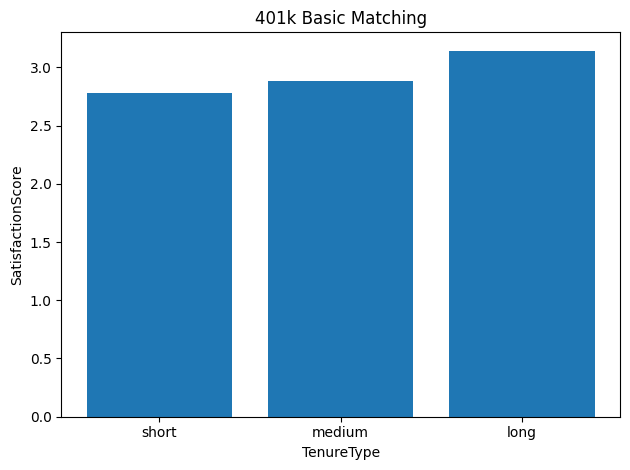

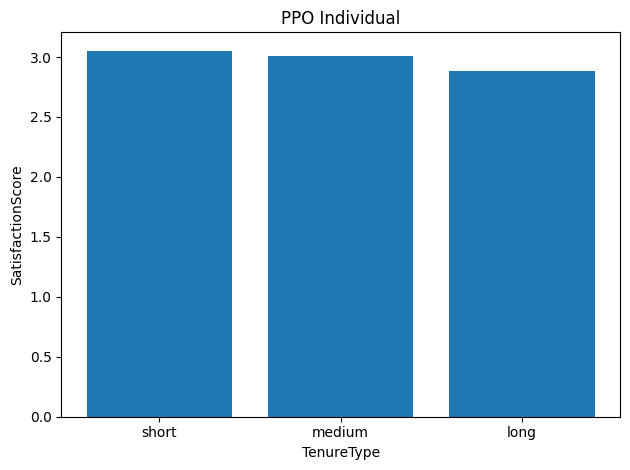

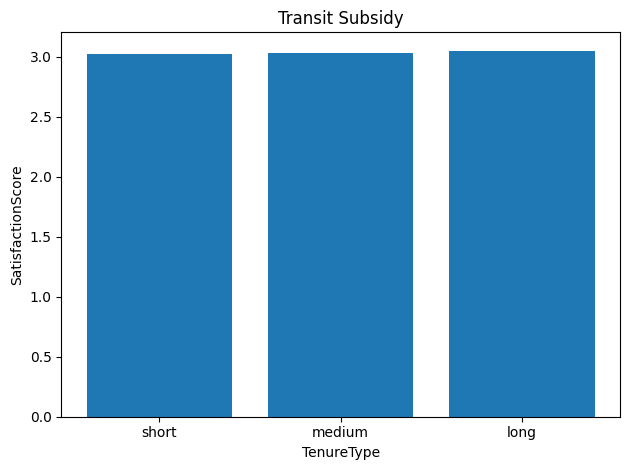

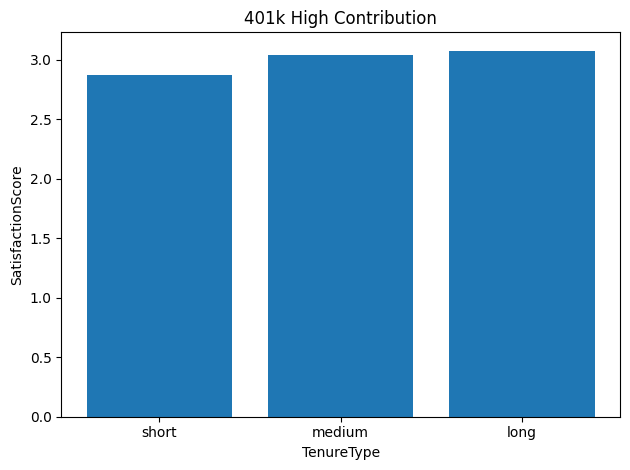

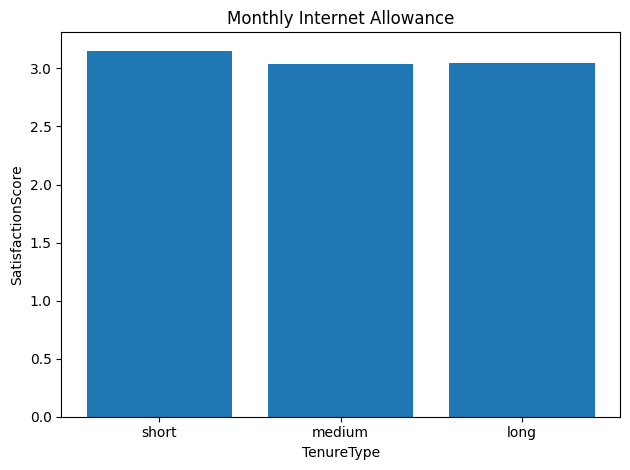

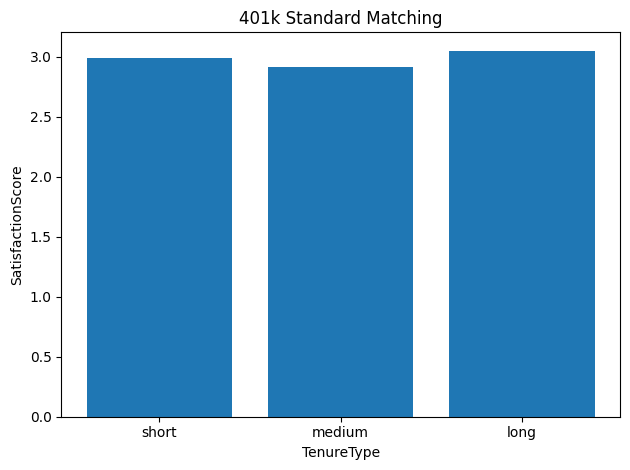

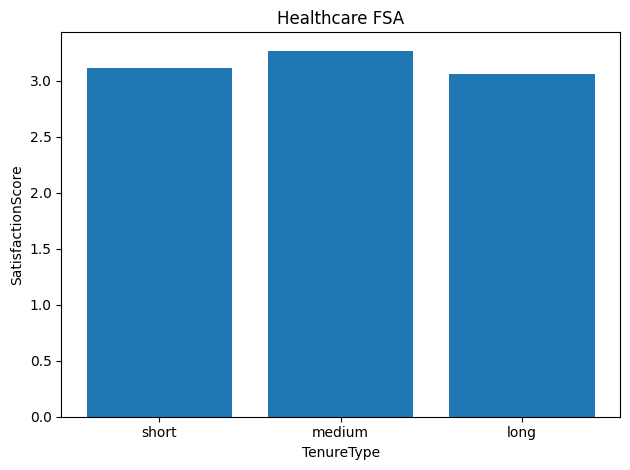

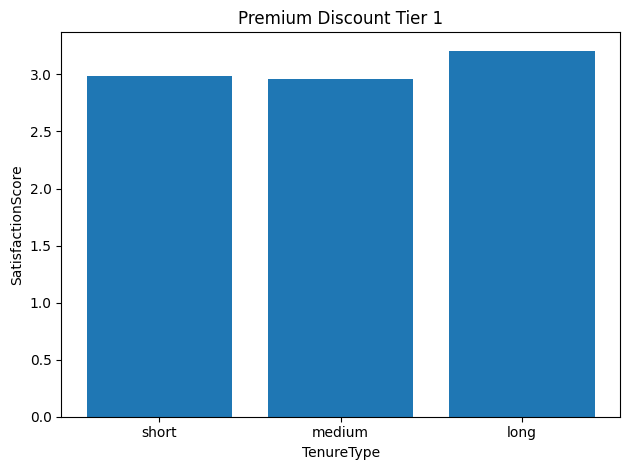

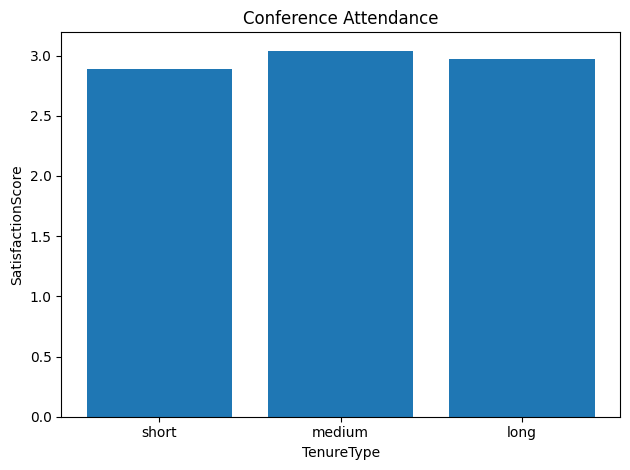

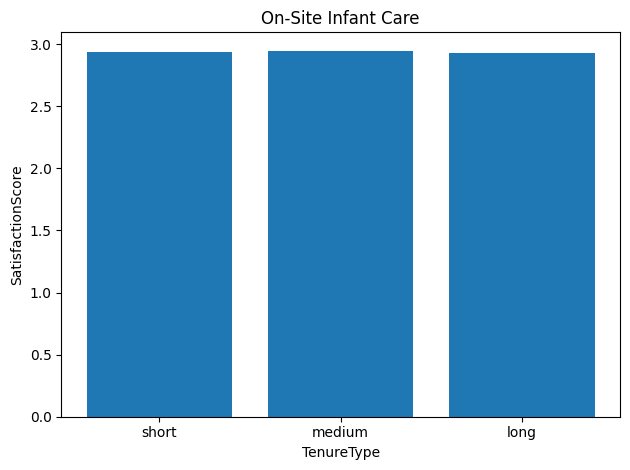

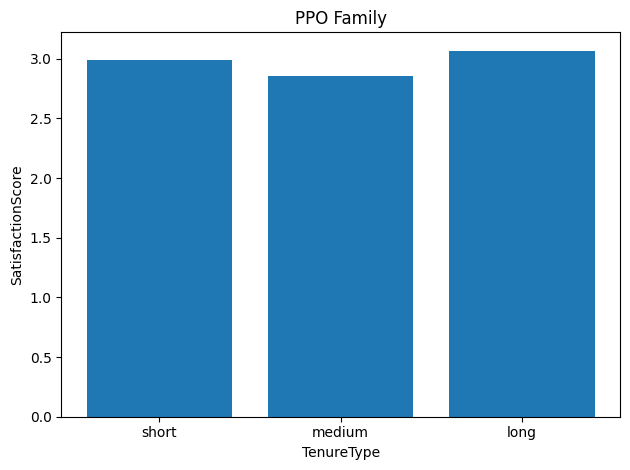

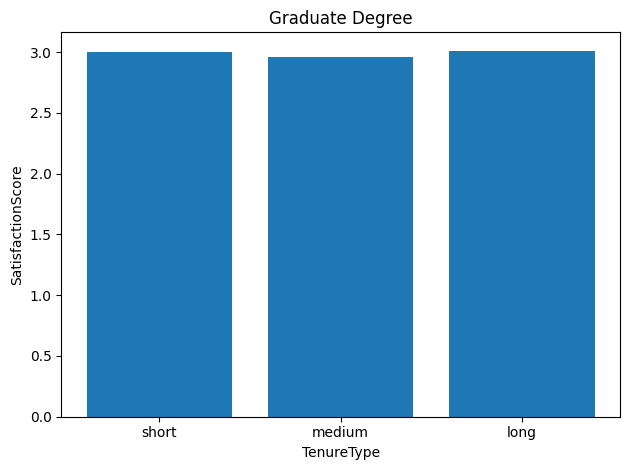

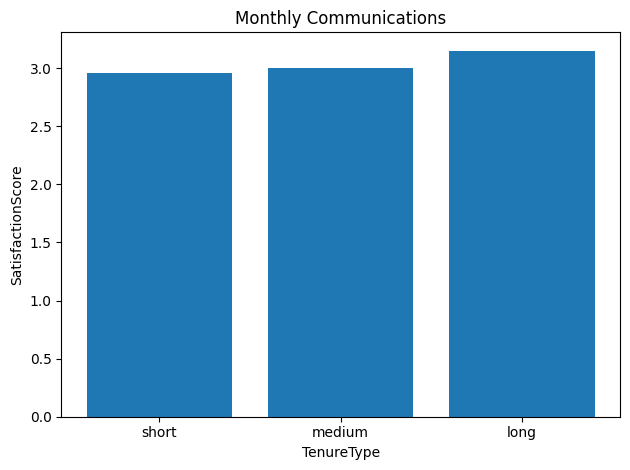

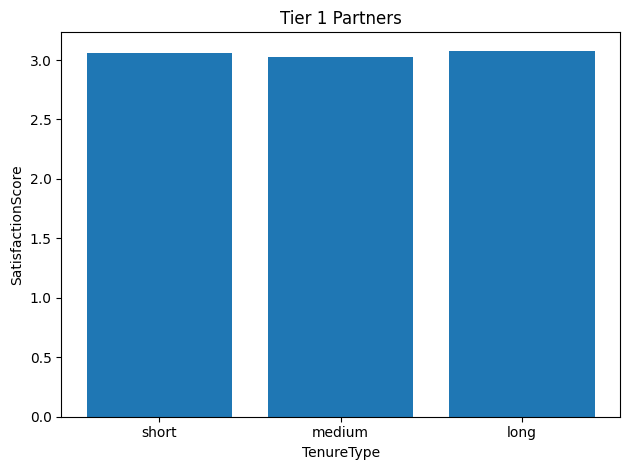

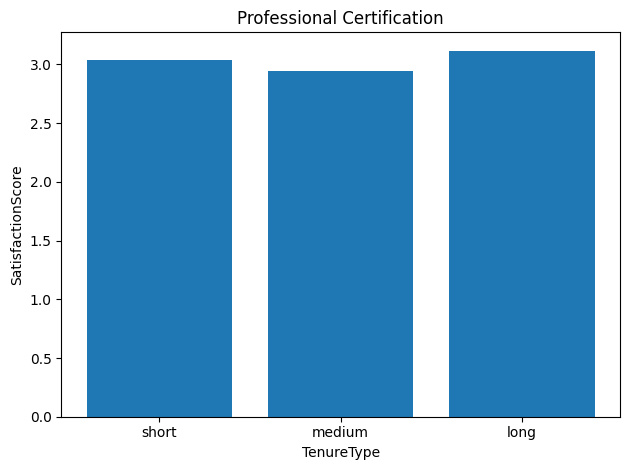

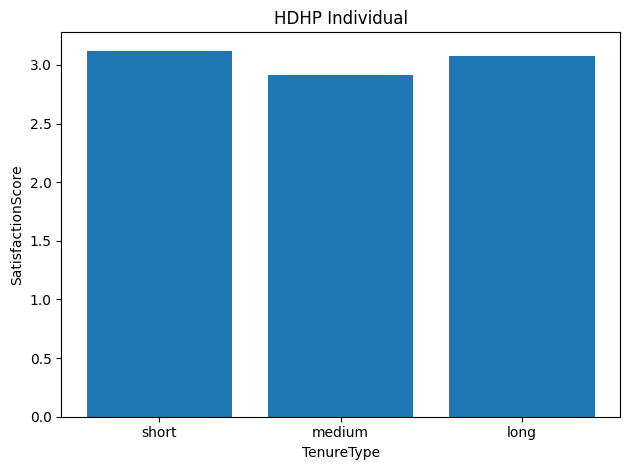

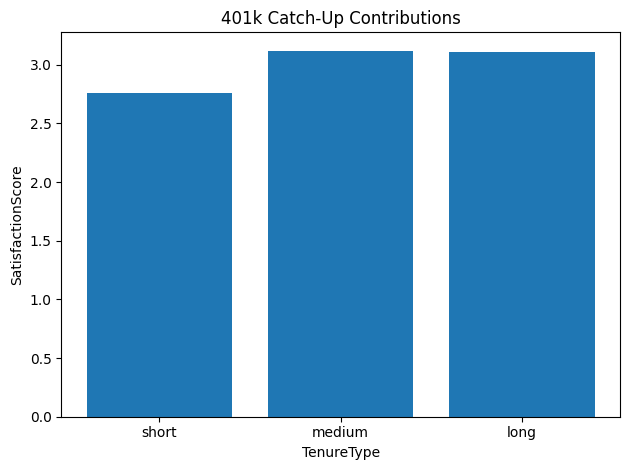

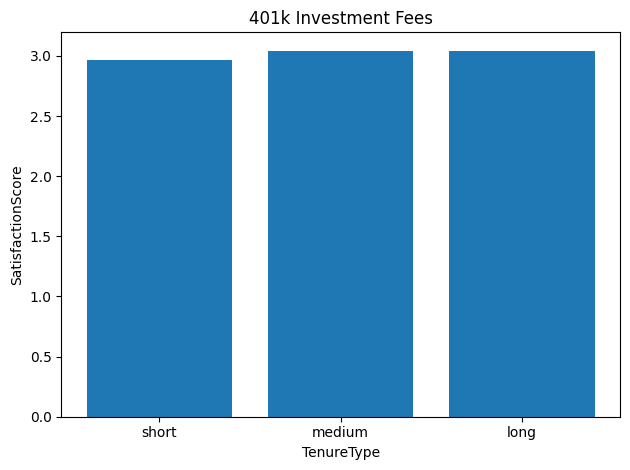

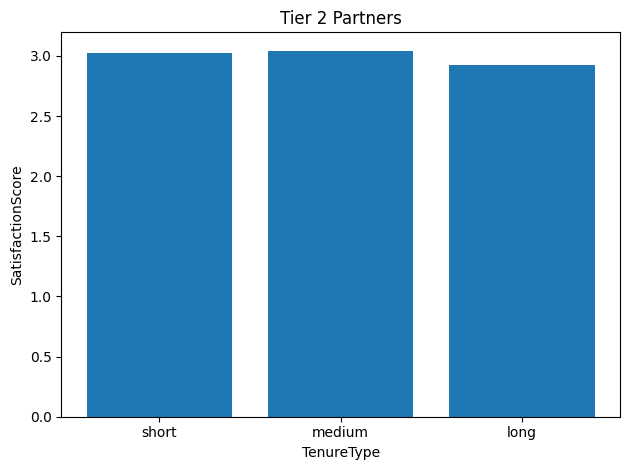

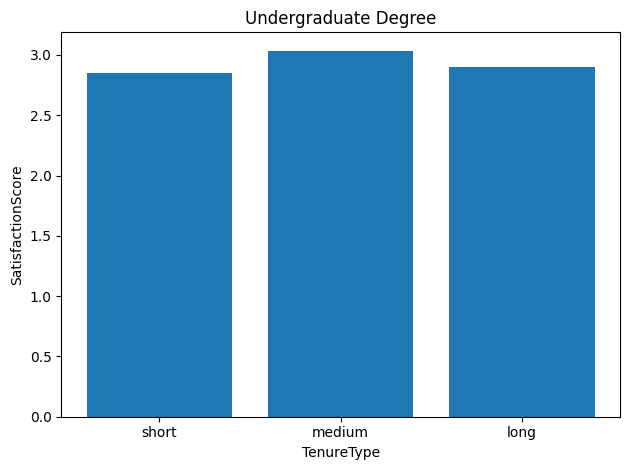

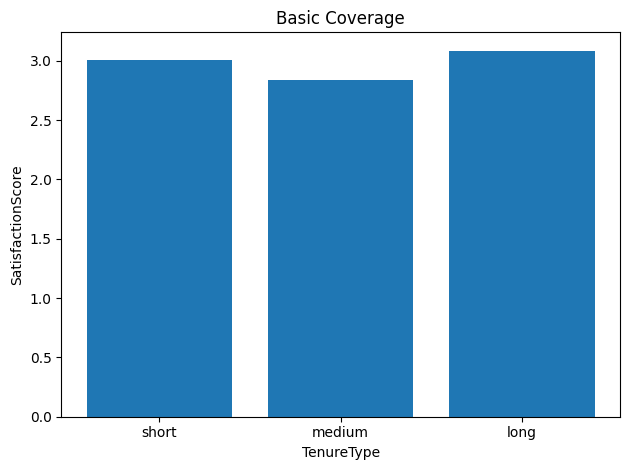

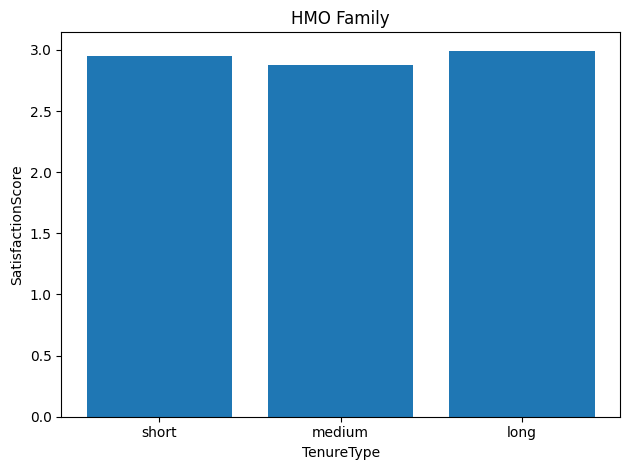

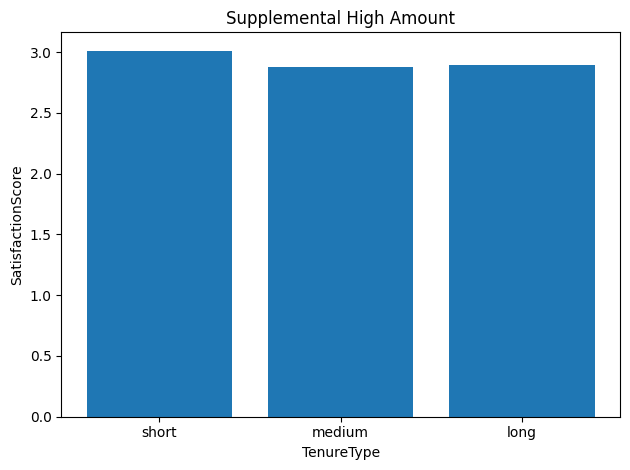

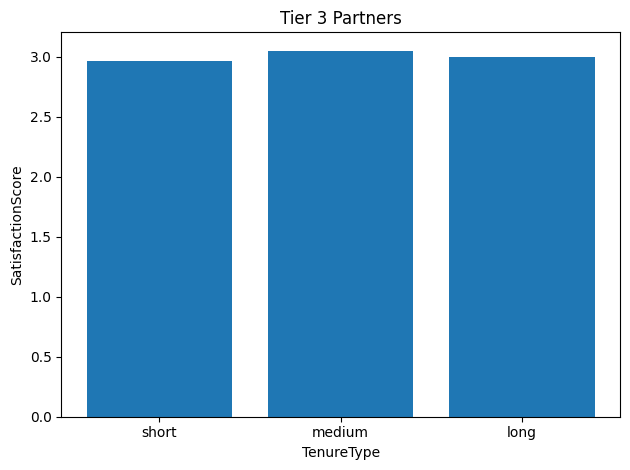

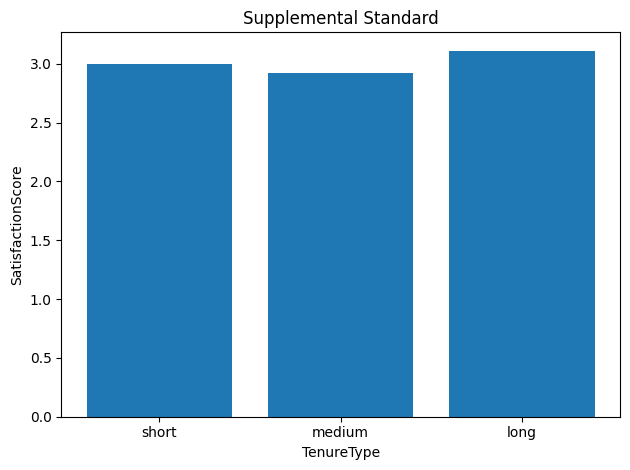

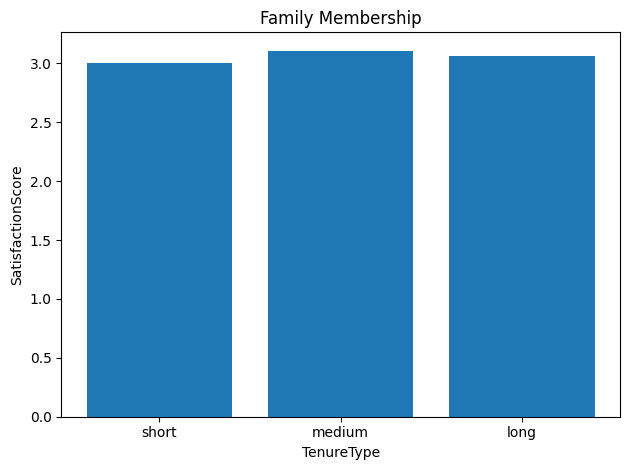

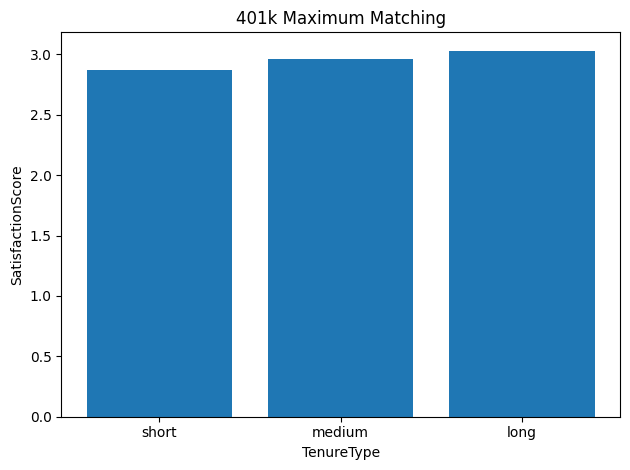

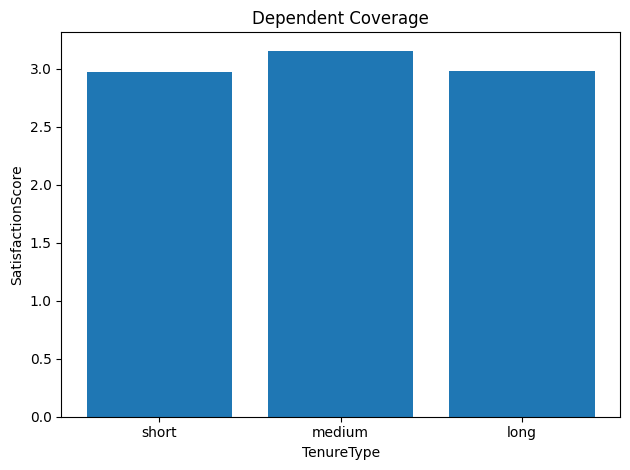

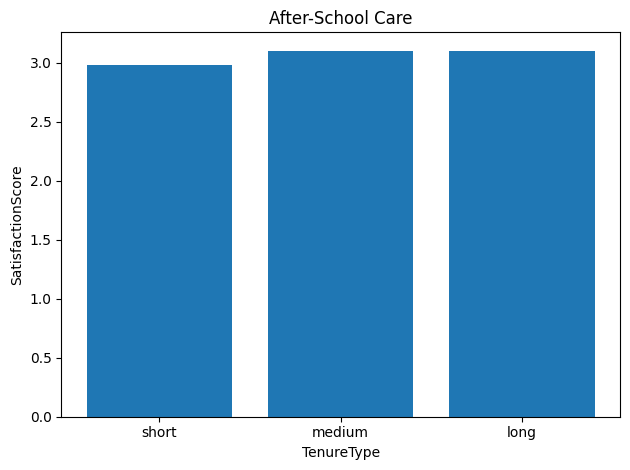

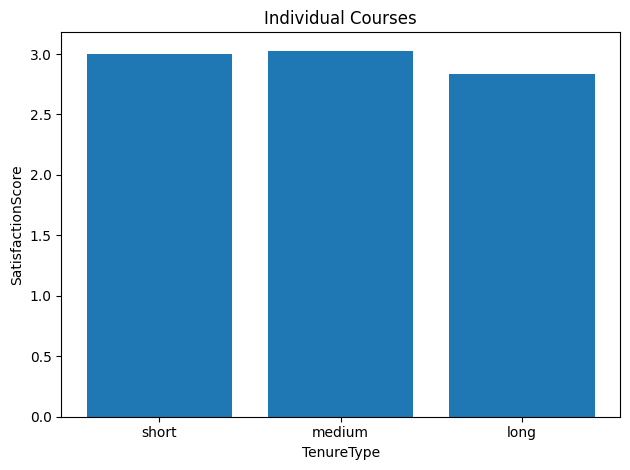

In [85]:
import matplotlib.pyplot as plt

for benefitID in range(1, 31):  # assuming BenefitID goes 1–31, not 0–30
    df = feedback_by_tenure[feedback_by_tenure['BenefitID'] == benefitID]

    plt.figure()
    plt.bar(df['TenureType'], df['SatisfactionScore'])
    plt.title(df['BenefitSubType'].iloc[0])
    plt.xlabel("TenureType")
    plt.ylabel("SatisfactionScore")
    plt.tight_layout()
    plt.show()

In [34]:
feedback_by_Gender = df[['Gender', 'SatisfactionScore']].groupby(['Gender'], as_index=False).mean()

In [35]:
feedback_by_Gender

,Gender,SatisfactionScore
0,Female,3.004954
1,Male,2.997408
2,Non-Binary,3.143773


In [39]:
cols_to_encode = ['Gender', 'Department', 'BenefitType', 'AgeGroup', 'TenureType', 'BenefitID']
encoded_df = pd.get_dummies(df, columns=cols_to_encode)

In [40]:
encoded_df.columns

Index(['index', 'EmployeeID', 'SatisfactionScore', 'BenefitSubType',
       'BenefitCost', 'Age', 'Tenure', 'Gender_Female', 'Gender_Male',
       'Gender_Non-Binary', 'Department_Finance', 'Department_HR',
       'Department_IT', 'Department_Marketing', 'Department_Sales',
       'BenefitType_Cell Phone Allowance', 'BenefitType_Childcare',
       'BenefitType_Commuter Benefits',
       'BenefitType_Flexible Spending Account', 'BenefitType_Gym Membership',
       'BenefitType_Health Insurance', 'BenefitType_Life Insurance',
       'BenefitType_Professional Development', 'BenefitType_Retirement Plan',
       'BenefitType_Technology Stipend', 'BenefitType_Tuition Reimbursement',
       'BenefitType_Wellness Programs', 'AgeGroup_Gen-z',
       'AgeGroup_Millennial', 'AgeGroup_Gen-X', 'AgeGroup_Boomer',
       'TenureType_short', 'TenureType_medium', 'TenureType_long',
       'BenefitID_1', 'BenefitID_2', 'BenefitID_3', 'BenefitID_4',
       'BenefitID_5', 'BenefitID_6', 'BenefitID_7', 'Be

In [46]:
cols_to_drop = ['index', 'EmployeeID', 'BenefitSubType', 'Age', 'Tenure']
encoded_df = encoded_df.drop(cols_to_drop, axis=1)

In [48]:
encoded_df.dtypes

SatisfactionScore                        float64
BenefitCost                              float64
Gender_Female                               bool
Gender_Male                                 bool
Gender_Non-Binary                           bool
Department_Finance                          bool
Department_HR                               bool
Department_IT                               bool
Department_Marketing                        bool
Department_Sales                            bool
BenefitType_Cell Phone Allowance            bool
BenefitType_Childcare                       bool
BenefitType_Commuter Benefits               bool
BenefitType_Flexible Spending Account       bool
BenefitType_Gym Membership                  bool
BenefitType_Health Insurance                bool
BenefitType_Life Insurance                  bool
BenefitType_Professional Development        bool
BenefitType_Retirement Plan                 bool
BenefitType_Technology Stipend              bool
BenefitType_Tuition 

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X = encoded_df.drop(columns=["SatisfactionScore"])
y = encoded_df["SatisfactionScore"]

# Scale only BenefitCost
scaler = RobustScaler()
X["BenefitCost"] = scaler.fit_transform(X[["BenefitCost"]])

model = LinearRegression().fit(X, y)
print("R²:", model.score(X, y))
print("Coefficients:", model.coef_)

R²: 0.0019685746556513672
Coefficients: [-0.04168887 -0.04380648 -0.05114161  0.09494808  0.01719598  0.00841375
 -0.02702279  0.00107345  0.00033962 -0.00510252  0.00238273  0.00295871
  0.06446122  0.00750559 -0.0229398  -0.02126656 -0.0049187  -0.01367983
  0.01328861 -0.02428766  0.00159822 -0.01356924  0.01185607 -0.00187193
  0.0035851  -0.02407988 -0.00525635  0.02933624 -0.0336342   0.00707253
  0.00295871 -0.01500646  0.01328861 -0.00684011  0.06446122  0.00159822
 -0.0049187  -0.04285211  0.00874036  0.02350661 -0.00510252 -0.00169327
  0.03085241  0.00487709  0.01363507  0.0380249  -0.03832989 -0.05414418
 -0.05266388 -0.04362978 -0.03252462  0.00701364  0.04031193  0.04051512
 -0.00985904  0.02361001  0.04523484 -0.02450251]
